In [16]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder 
from sklearn.decomposition import PCA
from sklearn import preprocessing 
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
from sklearn import cluster

In [17]:
df = pd.read_csv('3_data_2022062.csv')

In [18]:
df.head()

,Visitor Type,Month,Duration of product-related page visits,Information related page,User related page,Duration of Information related page visits,Exit Rate,Bounce Rate,Product related page,Web page value,Operating System,Weekend,Browser,Duration of User related page visits,Section,Traffic Model,Holidays,Whether or not to buy
0,Returning_Visitor,Dec,556.916667,0,0,0.000000,0.022436,0.010256,26,0.0,4,False,2,0.00,1,8,0.0,0
1,Returning_Visitor,Dec,2348.812500,5,0,39.833333,0.055167,0.020000,34,0.0,2,False,2,0.00,3,1,0.0,0
2,New_Visitor,June,1570.133333,6,0,89.800000,0.005357,0.000000,26,0.0,2,True,2,0.00,8,4,0.0,0
3,Returning_Visitor,Dec,821.682540,4,2,159.000000,0.019343,0.000617,33,0.0,2,False,2,27.75,1,2,0.0,1
4,Returning_Visitor,Jul,584.377778,5,2,38.577778,0.064352,0.000000,7,0.0,1,True,1,9.00,1,2,0.0,1


In [19]:
df.columns

Index(['Visitor Type', 'Month', 'Duration of product-related page visits',
       'Information related page', 'User related page',
       'Duration of Information related page visits', 'Exit Rate',
       'Bounce Rate', 'Product related page', 'Web page value',
       'Operating System', 'Weekend', 'Browser',
       'Duration of User related page visits', 'Section', 'Traffic Model',
       'Holidays', 'Whether or not to buy'],
      dtype='object')

In [20]:
df = df[["Visitor Type","Duration of product-related page visits","Duration of Information related page visits","Duration of User related page visits",'Exit Rate','Bounce Rate',"Whether or not to buy"]]

In [21]:
df

,Visitor Type,Duration of product-related page visits,Duration of Information related page visits,Duration of User related page visits,Exit Rate,Bounce Rate,Whether or not to buy
0,Returning_Visitor,556.916667,0.000000,0.00,0.022436,0.010256,0
1,Returning_Visitor,2348.812500,39.833333,0.00,0.055167,0.020000,0
2,New_Visitor,1570.133333,89.800000,0.00,0.005357,0.000000,0
3,Returning_Visitor,821.682540,159.000000,27.75,0.019343,0.000617,1
4,Returning_Visitor,584.377778,38.577778,9.00,0.064352,0.000000,1
...,...,...,...,...,...,...,...
8626,Returning_Visitor,402.500000,31.500000,0.00,0.002500,0.000000,0
8627,Returning_Visitor,2110.255093,265.433333,35.70,0.009762,0.003614,0
8628,Returning_Visitor,3038.380000,0.000000,0.00,0.038333,0.017535,0
8629,Returning_Visitor,2949.550000,32.750000,11.00,0.027165,0.015909,0


## 1. 检查遗漏数据

In [22]:
na_cols = df.isnull().any(axis = 0)
na_cols

Visitor Type                                   False
Duration of product-related page visits        False
Duration of Information related page visits    False
Duration of User related page visits           False
Exit Rate                                      False
Bounce Rate                                    False
Whether or not to buy                          False
dtype: bool

## 2 数据清理

In [23]:
corr =df.corr().round(2)

In [24]:
corr

,Duration of product-related page visits,Duration of Information related page visits,Duration of User related page visits,Exit Rate,Bounce Rate,Whether or not to buy
Duration of product-related page visits,1.00,0.37,0.35,-0.25,-0.18,0.14
Duration of Information related page visits,0.37,1.00,0.23,-0.21,-0.14,0.10
Duration of User related page visits,0.35,0.23,1.00,-0.10,-0.07,0.07
Exit Rate,-0.25,-0.21,-0.10,1.00,0.91,-0.21
Bounce Rate,-0.18,-0.14,-0.07,0.91,1.00,-0.15
Whether or not to buy,0.14,0.10,0.07,-0.21,-0.15,1.00


<AxesSubplot:>

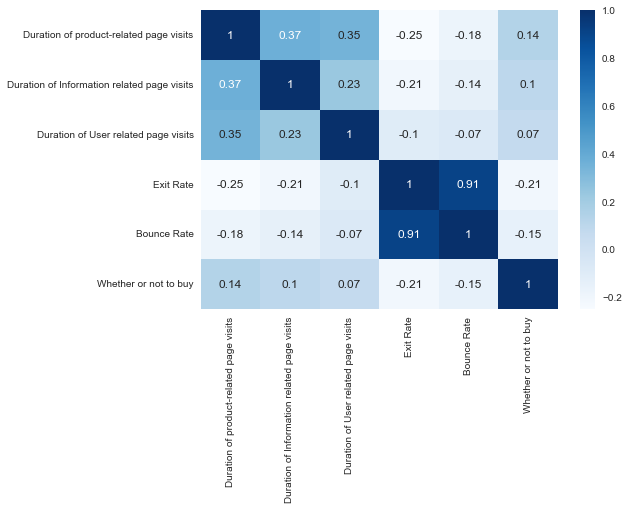

In [25]:
sns.heatmap(corr,cmap='Blues',annot = True)

Exit rate 和 bounce rate 相关性较高,可以考虑使用PCA

#### 对visitor type设计哑巴变量

In [29]:
cols = ['Visitor Type']
model_ohe = OneHotEncoder(sparse=False)  # 建立OneHotEncode对象
ohe_matrix = model_ohe.fit_transform(df[cols])  # 直接转换
print(ohe_matrix[:3])

[[0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [30]:
ohe_matrix1=pd.get_dummies(df[cols])
ohe_matrix1.head(5)

,Visitor Type_New_Visitor,Visitor Type_Other,Visitor Type_Returning_Visitor
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1


In [33]:
sacle_matrix = df.iloc[:, 1:-1]  # 获得要转换的矩阵
model_scaler = MinMaxScaler()  
data_scaled = model_scaler.fit_transform(sacle_matrix)  # MinMaxScaler 归一化
print(data_scaled.round(2))

[[0.01 0.   0.   0.11 0.05]
 [0.04 0.01 0.   0.28 0.1 ]
 [0.02 0.03 0.   0.03 0.  ]
 ...
 [0.05 0.   0.   0.19 0.09]
 [0.05 0.01 0.   0.14 0.08]
 [0.08 0.1  0.01 0.05 0.01]]


In [34]:
X = np.hstack((data_scaled, ohe_matrix))

In [35]:
X

array([[0.00870542, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.03671539, 0.01172   , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.02454349, 0.02642148, 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.04749434, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.04610579, 0.0096359 , 0.00431478, ..., 0.        , 0.        ,
        1.        ],
       [0.07530255, 0.09832046, 0.0133366 , ..., 0.        , 0.        ,
        1.        ]])

In [37]:
Y = df["Whether or not to buy"]

In [38]:
Y

0       0
1       0
2       0
3       1
4       1
       ..
8626    0
8627    0
8628    0
8629    0
8630    0
Name: Whether or not to buy, Length: 8631, dtype: int64

#### PCA 降维

In [39]:
pca = PCA(n_components=4)
pca.fit(X)
PCA_ds = pd.DataFrame(pca.transform(X), 
                      columns=(["col1","col2", "col3","col4"]))
print(PCA_ds)

          col1      col2      col3      col4
0    -0.176099 -0.148293 -0.002997 -0.019037
1    -0.206280 -0.002445 -0.003063  0.047800
2     1.230314  0.026904 -0.030427 -0.032191
3    -0.167636 -0.194180 -0.001385 -0.012420
4    -0.200348 -0.039777  0.001685  0.147251
...        ...       ...       ...       ...
8626 -0.155007 -0.252999 -0.002120 -0.051732
8627 -0.162464 -0.218253 -0.002736 -0.065278
8628 -0.192507 -0.069020 -0.003560  0.003149
8629 -0.183268 -0.113542 -0.003963 -0.030984
8630 -0.161847 -0.223795 -0.002649 -0.073805

[8631 rows x 4 columns]


## 3.K-means 聚类

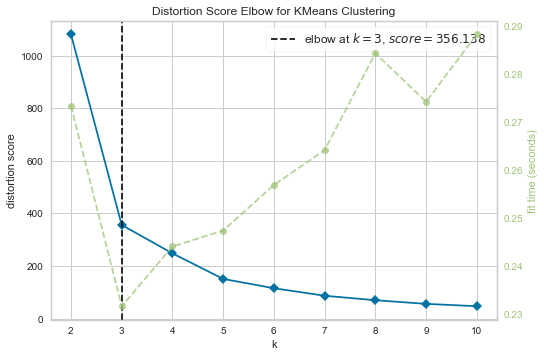

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [40]:
#手肘法确定K值
Elbow = KElbowVisualizer(KMeans(), k=10)
Elbow.fit(PCA_ds)
Elbow.show()

In [41]:
k_means =KMeans(3).fit_predict(PCA_ds) 
k_num = k_means
k_num_df = pd.DataFrame(k_num, columns=['clusters'])
new_data = pd.concat((df, k_num_df), axis=1)
print(new_data)

           Visitor Type  Duration of product-related page visits  \
0     Returning_Visitor                               556.916667   
1     Returning_Visitor                              2348.812500   
2           New_Visitor                              1570.133333   
3     Returning_Visitor                               821.682540   
4     Returning_Visitor                               584.377778   
...                 ...                                      ...   
8626  Returning_Visitor                               402.500000   
8627  Returning_Visitor                              2110.255093   
8628  Returning_Visitor                              3038.380000   
8629  Returning_Visitor                              2949.550000   
8630  Returning_Visitor                              4817.369546   

      Duration of Information related page visits  \
0                                        0.000000   
1                                       39.833333   
2                       

In [42]:
print(new_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8631 entries, 0 to 8630
Data columns (total 8 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Visitor Type                                 8631 non-null   object 
 1   Duration of product-related page visits      8631 non-null   float64
 2   Duration of Information related page visits  8631 non-null   float64
 3   Duration of User related page visits         8631 non-null   float64
 4   Exit Rate                                    8631 non-null   float64
 5   Bounce Rate                                  8631 non-null   float64
 6   Whether or not to buy                        8631 non-null   int64  
 7   clusters                                     8631 non-null   int32  
dtypes: float64(5), int32(1), int64(1), object(1)
memory usage: 505.8+ KB
None


## 4, 分析报告

### 1 Clustering数量分布

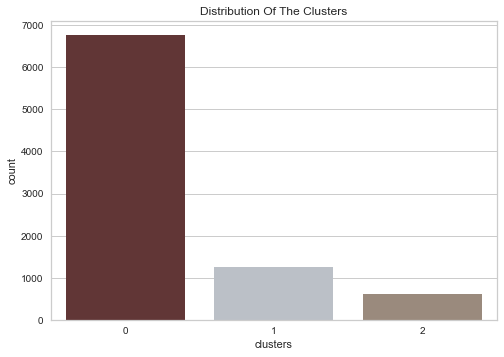

In [43]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=new_data["clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

### 2 不同clustering购买成功率

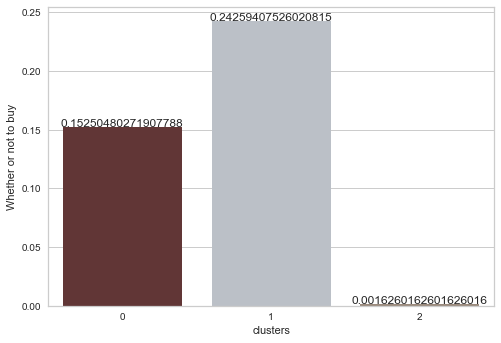

In [49]:
df_cost=pd.DataFrame(new_data['Whether or not to buy'].groupby(new_data["clusters"]).mean())
data={"clusters":[0,1,2]}
df_cost2=pd.DataFrame(data)
dt_c=pd.concat((df_cost, df_cost2), axis=1)
g=sns.barplot(x="clusters", y='Whether or not to buy', data=dt_c,palette= pal)
#添加数值
for index,row in dt_c.iterrows():
    g.text(row.clusters,row['Whether or not to buy'],row['Whether or not to buy'],ha="center")

### 3 不同clusteirng visitor type分布情况

<AxesSubplot:xlabel='Visitor Type'>

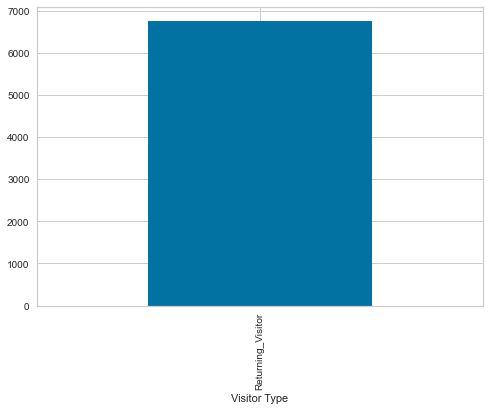

In [84]:
new_data[new_data['clusters'] == 0].groupby('Visitor Type')['Visitor Type'].count().plot(kind = 'bar')

<AxesSubplot:xlabel='Visitor Type'>

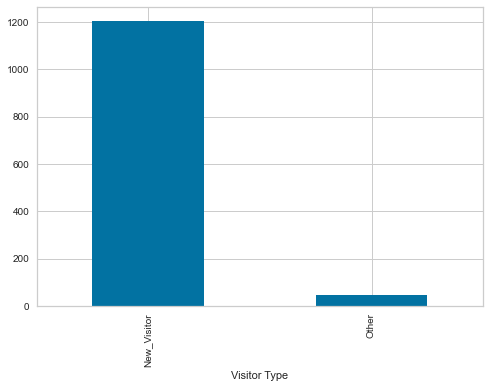

In [85]:
new_data[new_data['clusters'] == 1].groupby('Visitor Type')['Visitor Type'].count().plot(kind = 'bar')

<AxesSubplot:xlabel='Visitor Type'>

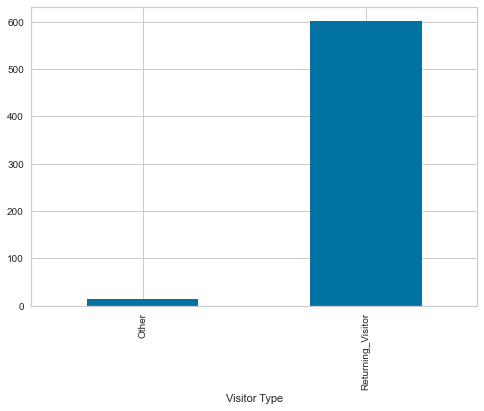

In [86]:
new_data[new_data['clusters'] == 2].groupby('Visitor Type')['Visitor Type'].count().plot(kind = 'bar')

### 4 不同clusteirng Duration of product-related page visit 均值

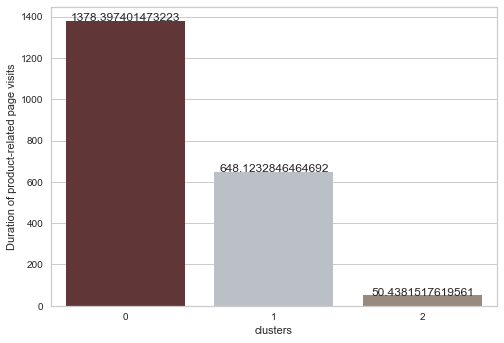

In [71]:
df_cost=pd.DataFrame(new_data['Duration of product-related page visits'].groupby(new_data["clusters"]).mean())
data={"clusters":[0,1,2]}
df_cost2=pd.DataFrame(data)
dt_c=pd.concat((df_cost, df_cost2), axis=1)
g=sns.barplot(x="clusters", y='Duration of product-related page visits', data=dt_c,palette= pal)
#添加数值
for index,row in dt_c.iterrows():
    g.text(row.clusters,row['Duration of product-related page visits'],row['Duration of product-related page visits'],ha="center")

### 5 不同clusteirng Duration of Information related page visits 均值

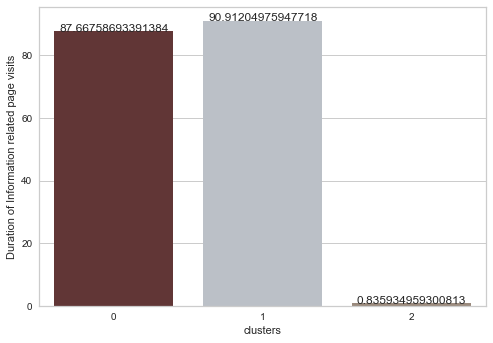

In [72]:
df_cost=pd.DataFrame(new_data['Duration of Information related page visits'].groupby(new_data["clusters"]).mean())
data={"clusters":[0,1,2]}
df_cost2=pd.DataFrame(data)
dt_c=pd.concat((df_cost, df_cost2), axis=1)
g=sns.barplot(x="clusters", y='Duration of Information related page visits', data=dt_c,palette= pal)
#添加数值
for index,row in dt_c.iterrows():
    g.text(row.clusters,row['Duration of Information related page visits'],row['Duration of Information related page visits'],ha="center")

### 6 不同clusteirng Duration of User related page visits 均值

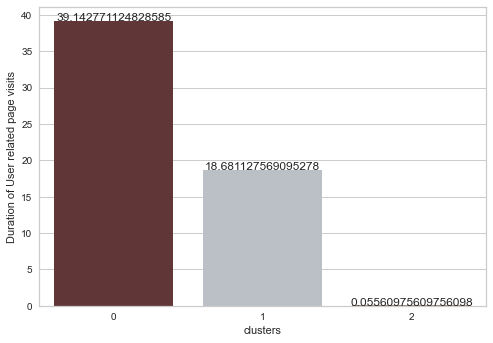

In [73]:
df_cost=pd.DataFrame(new_data['Duration of User related page visits'].groupby(new_data["clusters"]).mean())
data={"clusters":[0,1,2]}
df_cost2=pd.DataFrame(data)
dt_c=pd.concat((df_cost, df_cost2), axis=1)
g=sns.barplot(x="clusters", y='Duration of User related page visits', data=dt_c,palette= pal)
#添加数值
for index,row in dt_c.iterrows():
    g.text(row.clusters,row['Duration of User related page visits'],row['Duration of User related page visits'],ha="center")

### 7 不同clusteirng Exit Rate 均值

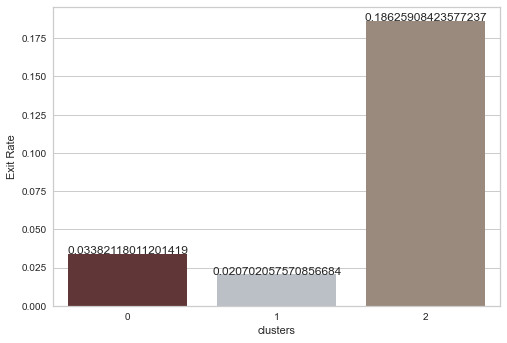

In [74]:
df_cost=pd.DataFrame(new_data['Exit Rate'].groupby(new_data["clusters"]).mean())
data={"clusters":[0,1,2]}
df_cost2=pd.DataFrame(data)
dt_c=pd.concat((df_cost, df_cost2), axis=1)
g=sns.barplot(x="clusters", y='Exit Rate', data=dt_c,palette= pal)
#添加数值
for index,row in dt_c.iterrows():
    g.text(row.clusters,row['Exit Rate'],row['Exit Rate'],ha="center")

### 8 不同clusteirng Bounce Rate 均值

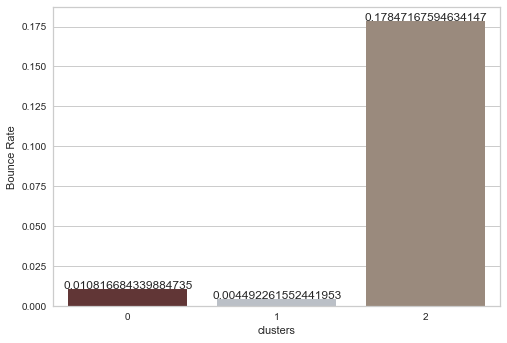

In [76]:
df_cost=pd.DataFrame(new_data['Bounce Rate'].groupby(new_data["clusters"]).mean())
data={"clusters":[0,1,2]}
df_cost2=pd.DataFrame(data)
dt_c=pd.concat((df_cost, df_cost2), axis=1)
g=sns.barplot(x="clusters", y='Bounce Rate', data=dt_c,palette= pal)
#添加数值
for index,row in dt_c.iterrows():
    g.text(row.clusters,row['Bounce Rate'],row['Bounce Rate'],ha="center")

## 5, Clustering Summary

In [82]:
d = {
     'New_Visitor_number': [0,1203,0],
     'Returning_Visitor_number': [6767,0,602],
     'Other_Visitor_number': [0,46,13],
     'Mean of Duration of product-related page visit': [1378.40,648.12,50.44],
     'Mean of Duration of Information related page visits': [87.67,90.91,0.84],
     'Mean of Duration of User related page visits':[39.14,18.68,0.06],
     'Mean of Exit Rate':[0.03382,0.02070,0.1863],
     'Mean of Bounce Rate':[0.01081,0.004492,0.1785],
     'Success Rate':[0.1525,0.2426,0.001626]
     }

In [83]:
pd.DataFrame(d)

,New_Visitor_number,Returning_Visitor_number,Other_Visitor_number,Mean of Duration of product-related page visit,Mean of Duration of Information related page visits,Mean of Duration of User related page visits,Mean of Exit Rate,Mean of Bounce Rate,Success Rate
0,0,6767,0,1378.40,87.67,39.14,0.03382,0.010810,0.152500
1,1203,0,46,648.12,90.91,18.68,0.02070,0.004492,0.242600
2,0,602,13,50.44,0.84,0.06,0.18630,0.178500,0.001626


Summary on each group: 

Group 0
make up by the majority of returning visitors: high duration of product-related page visit, high duration of user realted page visits, 15% chance of purchasing

Group1 make up by new visitors : moderate duration of product-related page visit, moderate duration of user related page visits, 24% chance of purchasing

Group2 make up by roughly 10% of the returning visitor: low duration in any page visits, high rate of exit and bounce. roughly 0.16% chance of purchasing